In [1]:
import igimf as ii

In [2]:
import igimf.instance as inst

In [3]:
import numpy as np
mstar_l=0.07
mstar_u=150
mstar_v = np.logspace(np.log10(mstar_l),np.log10(mstar_u), num=50)


### This is what happens when you run instance

In [4]:
massfrac, SFR, Mtot, stellar_IMF, ecl_MF, t_IGIMF = inst.main()

beta=2.0, 	upper_lim=10000000000.0

At a time t characterized by:
SFR=1.00e+00
and 
Mtot=1.00e+10


dictionary of an e.cl.'s stellar IMF

{
    "metal_mass_fraction": 0.00134,
    "SFR": 1.0,
    "solar_metallicity": 0.0134,
    "delta_alpha": 63.0,
    "m_star_max": 150.1,
    "m_star_min": 0.07,
    "suppress_warnings": false,
    "M_ecl_max": 10000000000.0,
    "M_ecl_min": 5.0,
    "delta_t": 10000000.0,
    "Mtot": 10000000.0,
    "metallicity": -1.0,
    "M_ecl": 10000000000.0,
    "alpha_1": 0.5402199999999999,
    "alpha_2": 1.54022,
    "alpha_3": 0.6851950000000002,
    "k_star": 18076422.85318834,
    "m_max": 150.09999828551904,
    "IMF_func": "<numpy.vectorize object at 0x1056e4550>",
    "IMF_mass_weighted_func": "<numpy.vectorize object at 0x1056e4520>"
}


dictionary of a galaxy's ECMF

{
    "metal_mass_fraction": 0.00134,
    "SFR": 1.0,
    "solar_metallicity": 0.0134,
    "delta_alpha": 63.0,
    "m_star_max": 150.1,
    "m_star_min": 0.07,
    "suppress_warnings":

/Users/edagjergo/Downloads/GitHub/IGIMF/igimf/util.py:89: RuntimeWarning: divide by zero encountered in reciprocal
  return np.reciprocal(integral_powerlaw(x, upper_lim, alpha3))
/Users/edagjergo/Downloads/GitHub/IGIMF/igimf/util.py:36: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(ul**(1-power) - ll**(1-power), 1-power)


In [5]:
#t_IGIMF.IGIMF_func(mstar_v)

In [6]:
from sklearn.model_selection import ParameterGrid

#Mecl_v = np.array([5.,10.,1.e2,1.e3,1.e5,1.e7,1.e8,1.e9,1.e10])
resolution = 20
Mecl_v = np.logspace(np.log10(5),10,num=resolution)
Z_massfrac_v = np.logspace(-7,.5,num=resolution)
solar_metallicity = 0.0134
Z_massfrac_v *= solar_metallicity
metallicity_v = np.log10(Z_massfrac_v/solar_metallicity)
parameter_space = {'[Z]': metallicity_v,
                   'M_ecl': Mecl_v}
dict_list = list(ParameterGrid(parameter_space))

rho_cl = lambda M_ecl: 10**(0.61 * np.log10(M_ecl) + 2.85)
rho_cl_func = np.vectorize(rho_cl)
rho_cl_v = rho_cl_func(Mecl_v)
parameter_space['rho_cl'] = rho_cl_v

def x_func(Z,rho):
    return -0.14 * Z + 0.99 * np.log10(rho) - 6
    
def alpha3(x):
    return -0.41 * x + 1.94

def alpha3_Y21(x):#_Y21(x):
    if x < -0.87:
        return 2.3
    else:
        return -0.41 * x + 1.94

alpha3_func = np.vectorize(alpha3)

In [7]:
rho_cl_v

array([1.88960793e+03, 3.75823314e+03, 7.47473386e+03, 1.48664663e+04,
       2.95678513e+04, 5.88073732e+04, 1.16961734e+05, 2.32624693e+05,
       4.62666258e+05, 9.20194946e+05, 1.83017180e+06, 3.64002088e+06,
       7.23962199e+06, 1.43988533e+07, 2.86378178e+07, 5.69576336e+07,
       1.13282794e+08, 2.25307666e+08, 4.48113455e+08, 8.91250938e+08])

In [8]:
x_v = []
for pair in dict_list:
    r = rho_cl_func(pair['M_ecl'])
    #print(f"{r = }")
    xval = x_func(pair['[Z]'], r)
    x_v.append(xval)

In [9]:
alpha3_v = alpha3_func(x_v)

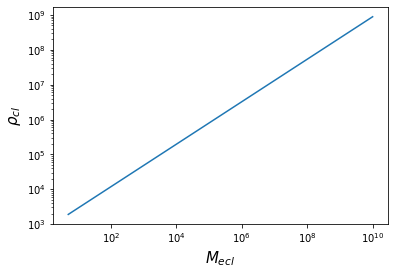

In [10]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(6,4))
axs.loglog(Mecl_v, rho_cl_v)
axs.set_ylabel(r'$\rho_{cl}$',fontsize=15)
axs.set_xlabel(r'$M_{ecl}$',fontsize=15)
fig.savefig('figs/Mecl_rhocl.pdf')

In [11]:
np.where(rho_cl_v>1e6)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),)

In [12]:
np.min(alpha3_v)

0.3653949999999999

In [13]:
rho_cl_v[9]

920194.9456692204

In [14]:
Mecl_inv = lambda rho_: np.power(10,(np.log10(rho_) - 2.85)/0.61)
print(Mecl_inv(1e6))
print('mass should exceed this value for Eq.(6) to compute the log')

145859.40117250354
mass should exceed this value for Eq.(6) to compute the log


In [15]:
parameter_space

{'[Z]': array([-7.        , -6.60526316, -6.21052632, -5.81578947, -5.42105263,
        -5.02631579, -4.63157895, -4.23684211, -3.84210526, -3.44736842,
        -3.05263158, -2.65789474, -2.26315789, -1.86842105, -1.47368421,
        -1.07894737, -0.68421053, -0.28947368,  0.10526316,  0.5       ]),
 'M_ecl': array([5.00000000e+00, 1.54346896e+01, 4.76459284e+01, 1.47080023e+02,
        4.54026898e+02, 1.40155284e+03, 4.32650661e+03, 1.33556573e+04,
        4.12280848e+04, 1.27268538e+05, 3.92870075e+05, 1.21276553e+06,
        3.74373189e+06, 1.15566679e+07, 3.56747162e+07, 1.10125634e+08,
        3.39950995e+08, 1.04940761e+09, 3.23945615e+09, 1.00000000e+10]),
 'rho_cl': array([1.88960793e+03, 3.75823314e+03, 7.47473386e+03, 1.48664663e+04,
        2.95678513e+04, 5.88073732e+04, 1.16961734e+05, 2.32624693e+05,
        4.62666258e+05, 9.20194946e+05, 1.83017180e+06, 3.64002088e+06,
        7.23962199e+06, 1.43988533e+07, 2.86378178e+07, 5.69576336e+07,
        1.13282794e+08, 2.2530

In [16]:
!pip install colorcet

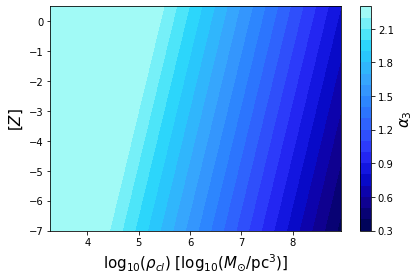

In [17]:
def alpha3_plot(alpha3_v, x_v, parameter_space):
    import colorcet as cc
    fig,ax = plt.subplots(figsize=(6,4))
    x,y = np.meshgrid(np.log10(parameter_space['rho_cl']), parameter_space['[Z]'])
    z = np.array(alpha3_v).reshape(resolution,resolution).T
    cax = ax.contourf(x, y, z, resolution, cmap=cc.cm.CET_L6)
    plt.xlabel(r'$\log_{10}(\rho_{cl})$ [$\log_{10}(M_{\odot}/{\rm pc}^3)$]', fontsize=15)
    plt.ylabel(r'[$Z$]', fontsize=15)
    cbar = fig.colorbar(cax)
    cbar.set_label(r'$\alpha_3$', fontsize=15)
    plt.tight_layout()
    plt.savefig('figs/alpha3plot.pdf')
alpha3_plot(alpha3_v, x_v, parameter_space)